## Quiz #0501

### "Logistic Regression and Gradient Descent Algorithm"

#### Answer the following questions by providing Python code:
#### Objectives:
- Code a logistic regression class using only the NumPy library.
- Implement in Python the Sigmoid function.
- Implement in Python the Gradient of the logarithmic likelihood.
- Implement in Python the Gradient Descent Algorithm.

In [23]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons


#### Read in data:

In [4]:
# Load data.
data = load_breast_cancer()
# Explanatory variables.
X = data['data']
# Relabel such that 0 = 'benign' and 1 = malignant.
Y = 1 - data['target']

In [5]:
# Split the dataset into training and testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1234)

1). Define the 'sigmoid' and 'gradient' functions to produce the output shown below:

In [11]:
def sigmoid(x):
  return (1/1+np.exp(-x))
       # <Your code goes in here>
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)
def predict(X, params):
    return np.round(sigmoid(X @ params))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


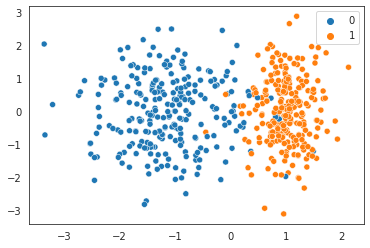

In [12]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

y = y[:,np.newaxis]

sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in matmul
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in matmul
  from ipykernel import kernelapp as app


Initial Cost is: [[nan]] 

Optimal Parameters are: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] 



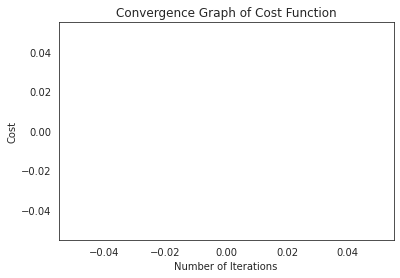

In [18]:
m = len(y)
X = np.hstack((np.ones((m,1)),X))
n = np.size(X,1)
params = np.zeros((n,1))

iterations = 1500
learning_rate = 0.03

initial_cost = compute_cost(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


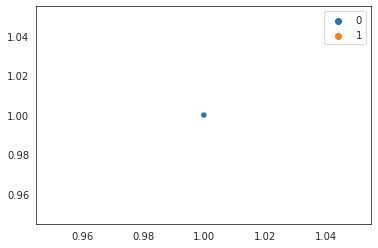

In [19]:
slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])

sns.set_style('white')
sns.scatterplot(X[:,1],X[:,2],hue=y.reshape(-1));

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");

In [17]:
y_pred = predict(X, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))

print(score)

0.0


2). Define the 'LogisticRegression' class to produce the output shown below:

In [46]:
class LogisticRegression:
    def __init__(self, learn_rate):
        self.rate = learn_rate
        self.n_nodes = None
        self.beta = None
    def normalize(X):
      m, n = X.shape
    
      for i in range(n):
         X = (X - X.mean(axis=0))/X.std(axis=0)
      return x
    def train(X, y, bs, epochs, lr):
        m, n = X.shape
        w = np.zeros((n,1))
        b = 0
        y=y.reshape(m,1)
        x = normalize(X)
        losses = []
        for epoch in range(epochs):
            for i in range((m-1)//bs + 1):
              start_i = i*bs
              end_i = start_i + bs
              xb = X[start_i:end_i]
              yb = y[start_i:end_i]
        y_hat = sigmoid(np.dot(xb, w) + b)
        dw, db = gradients(xb, yb, y_hat)
        w -= lr*dw
        b -= lr*db
        l = losses(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)     
        return w, b, losses


             


In [47]:
X, y = make_moons(n_samples=100, noise=0.24)

#### Sample run:

In [ ]:
# Hyperparameter for the learner.
learning_rate = 0.001

In [ ]:
# Train and predict.
LR = LogisticRegression(learning_rate)
LR.train(X_train, Y_train, 2000)
Y_pred = LR.query(X_test,cutoff=0.5)

In [ ]:
# Display the accuracy.
acc = (Y_pred == Y_test.reshape(-1,1)).mean()
print('Accuracy : {}'.format(np.round(acc,3)))